In [8]:
import zipfile 
with zipfile.ZipFile('Image_classification_data.zip', 'r') as zip_ref: 
    zip_ref.extractall('./') 

In [11]:
#The dataset consists of the images and a csv file. The labels and the image paths are in the CSV file.  
#Lets randomly split the data into train/val/test"
import numpy as np 
from sklearn.model_selection import train_test_split 
import pandas as pd 
data = pd.read_csv('./data_labels_mainData.csv') 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42) 
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42) 
print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))


Train data : 5937, Val Data: 1979, Test Data: 1980


In [12]:
import matplotlib.pyplot as plt 
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'): 
    plt.figure(figsize=(10,5)) 
    plt.subplot(1,2,1) 
    plt.plot(train_loss, 'r--') 
    plt.plot(val_loss, 'b--') 
    plt.xlabel("epochs") 
    plt.ylabel("Loss") 
    plt.legend(['train', 'val'], loc='upper left') 
    plt.subplot(1,2,2) 
    plt.plot(train_metric, 'r--') 
    plt.plot(val_metric, 'b--') 
    plt.xlabel("epochs") 
    plt.ylabel(metric_name) 
    plt.legend(['train', 'val'], loc='upper left') 
    plt.show()

In [14]:
INPUT_DIM = (32,32,3) 
HIDDEN_LAYER_DIM = 256 
OUTPUT_CLASSES = 10

In [15]:
import tensorflow as tf 
AUTOTUNE = tf.data.experimental.AUTOTUNE 
tf.__version__

'2.3.0'

In [17]:
import tensorflow as tf 
model = tf.keras.Sequential([ 
tf.keras.layers.Flatten(input_shape=INPUT_DIM), 
tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'), tf.keras.layers.Dense(OUTPUT_CLASSES)])


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


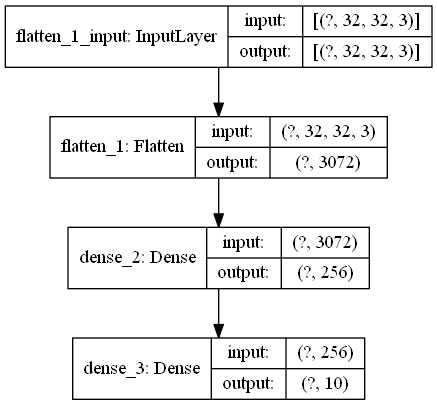

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)


In [20]:
model.compile(optimizer='SGD',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['categorical_accuracy'])


In [22]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str') 
val_data['isCancerous'] = val_data['isCancerous'].astype('str')


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last') 
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last') 
batch_size = 32 
train_generator = train_datagen.flow_from_dataframe( dataframe=train_data,  directory='./', x_col="cellTypeName", y_col="isCancerous", 
    target_size=(32, 32), batch_size=batch_size,class_mode='categorical') 
validation_generator = val_datagen.flow_from_dataframe( dataframe=val_data,  directory='./', x_col="cellTypeName", y_col="isCancerous", 
    target_size=(32, 32),batch_size=batch_size,   class_mode='categorical')


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\SAI\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:282: UserWarning: Found 5937 invalid image filename(s) in x_col="cellTypeName". These filename(s) will be ignored.
  .format(n_invalid, x_col)
C:\Users\SAI\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:282: UserWarning: Found 1979 invalid image filename(s) in x_col="cellTypeName". These filename(s) will be ignored.
  .format(n_invalid, x_col)
